<a href="https://colab.research.google.com/github/zlximon/Tensorflow_DL/blob/master/TransferLearning(fine_tuning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-05-21 16:24:12--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-05-21 16:24:12 (78.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
#import our helper functions 
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir


In [3]:
# downloding data 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")


--2022-05-21 16:24:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.112, 142.251.45.112, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   119MB/s    in 1.3s    

2022-05-21 16:24:19 (119 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [5]:
train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

In [6]:
import tensorflow as tf
IMAGE_SIZE=(224,224)

train_data_10p=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,image_size=IMAGE_SIZE, label_mode="categorical",batch_size=32)
test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,image_size=IMAGE_SIZE, label_mode="categorical",batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
#in this way of creation train_data , our output type is BatchDataset with is diffrent from previous one 
train_data_10p

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [8]:
train_data_10p.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
#creating model with functional API , functional API gives more flexibility
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False 
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
#x=tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(input) , if we need normalizing 
x = base_model(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_layer")(x)#
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)
model1=tf.keras.Model(inputs, outputs)
model1.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history1=model1.fit(train_data_10p,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10p),
                                 validation_data=test_data,
                                 validation_steps=int(0.25 * len(test_data)),
                                 callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                        experiment_name="10_percent_feature_extraction")])

16719872/16705208 [==============================] - 0s 0us/step
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20220521-162427
Epoch 1/5
24/24 [==============================] - 21s 221ms/step - loss: 1.9319 - accuracy: 0.3933 - val_loss: 1.3633 - val_accuracy: 0.7007
Epoch 2/5
24/24 [==============================] - 5s 182ms/step - loss: 1.1457 - accuracy: 0.7373 - val_loss: 0.9207 - val_accuracy: 0.8125
Epoch 3/5
24/24 [==============================] - 5s 182ms/step - loss: 0.8456 - accuracy: 0.8093 - val_loss: 0.7316 - val_accuracy: 0.8487
Epoch 4/5
24/24 [==============================] - 5s 182ms/step - loss: 0.6969 - accuracy: 0.8320 - val_loss: 0.6436 - val_accuracy: 0.8618
Epoch 5/5
24/24 [==============================] - 4s 146ms/step - loss: 0.5975 - accuracy: 0.8613 - val_loss: 0.5928 - val_accuracy: 0.8553


In [10]:
model1.evaluate(test_data)

79/79 [==============================] - 6s 74ms/step - loss: 0.6105 - accuracy: 0.8428


[0.610503613948822, 0.8428000211715698]

In [11]:
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [12]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [13]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_layer (Globa  (None, 1280)             0         
 lAveragePooling2D)                                              
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


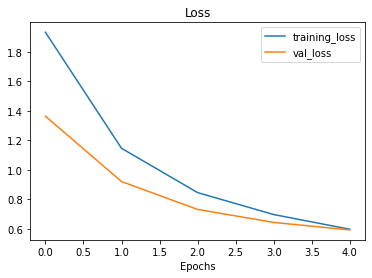

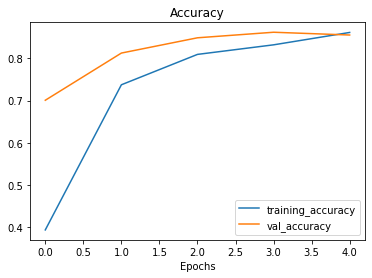

In [14]:
plot_loss_curves(history1)

In [15]:
#GlobalAveragePooling2D
tf.random.set_seed(42)
input_shape=(1,4,4,3)
input_tensor=tf.random.normal(input_shape)
#print("random input tensor :\n",input_tensor)
GlobalAveragePooling2D=tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print("GlobalAveragePooling2D tensor :\n",GlobalAveragePooling2D)

print("input_tensor",input_tensor.shape)
print("input_shape",GlobalAveragePooling2D.shape)
#GlobalAveragePooling2D condensed our layers 

GlobalAveragePooling2D tensor :
 tf.Tensor([[-0.09368646 -0.45840448 -0.2885598 ]], shape=(1, 3), dtype=float32)
input_tensor (1, 4, 4, 3)
input_shape (1, 3)


In [16]:
tf.reduce_mean(input_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

so GlobalAveragePooling2D , takes the average the second , and third dimension and replace them  

In [17]:
#GlobalMaxPooling2D
tf.random.set_seed(42)
input_shape=(1,4,4,3)
input_tensor=tf.random.normal(input_shape)
#print("random input tensor :\n",input_tensor)
GlobalMaxPooling2D=tf.keras.layers.GlobalMaxPooling2D()(input_tensor)
print("GlobalMaxPooling2D tensor :\n",GlobalMaxPooling2D)

print("input_tensor",input_tensor.shape)
print("input_shape",GlobalMaxPooling2D.shape)
#GlobalMaxPooling2D condensed our layers 

GlobalMaxPooling2D tensor :
 tf.Tensor([[0.9058464 1.1603122 1.6994323]], shape=(1, 3), dtype=float32)
input_tensor (1, 4, 4, 3)
input_shape (1, 3)


In [18]:
tf.reduce_max(input_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

#Models with 1% of data 

In [19]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip 
unzip_data("10_food_classes_1_percent.zip")

--2022-05-21 16:25:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 142.250.188.48, 172.217.1.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   269MB/s    in 0.5s    

2022-05-21 16:25:18 (269 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [20]:
import tensorflow as tf

In [21]:

train_dir_1p="10_food_classes_1_percent/train"
test_dir="10_food_classes_1_percent/test"

In [22]:
IMG_SIZE=(224,224)
train_data_1p=tf.keras.preprocessing.image_dataset_from_directory(train_dir_1p,label_mode="categorical",image_size=IMAGE_SIZE,batch_size=32  ,)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode="categorical",image_size=IMAGE_SIZE,batch_size=32  ,)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


#model wtih data augmentation 

we can use data augmentation  and rescaling as a layer with preprocessing layer
, it has some benefits vs ImageDataGenerator

In [23]:
data_augmentation=tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
  tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
#  tf.keras.layers.experimental.preprocessing.Rescaling(1/255.) if we want to rescale 


  ])

(-0.5, 511.5, 383.5, -0.5)

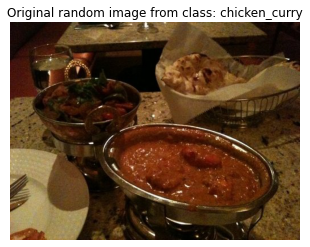

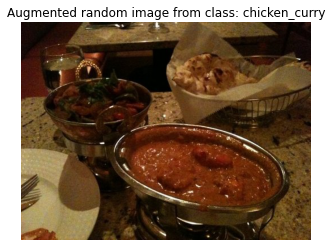

In [24]:
# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1p.class_names) # choose a random class
target_dir = "10_food_classes_1_percent/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False)

In [25]:
#creating model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_2 = tf.keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2_percent = model_2.fit(train_data_1p,
                    epochs=5,
                    steps_per_epoch=len(train_data_1p),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), 
                    
                    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])


Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20220521-162522
Epoch 1/5
3/3 [==============================] - 12s 2s/step - loss: 2.4199 - accuracy: 0.0571 - val_loss: 2.2048 - val_accuracy: 0.1957
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1766 - accuracy: 0.2714 - val_loss: 2.0803 - val_accuracy: 0.2730
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.9769 - accuracy: 0.4429 - val_loss: 1.9625 - val_accuracy: 0.3651
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.8177 - accuracy: 0.5286 - val_loss: 1.9008 - val_accuracy: 0.4145
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6368 - accuracy: 0.6143 - val_loss: 1.7957 - val_accuracy: 0.4671


In [26]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 70ms/step - loss: 1.8195 - accuracy: 0.4396


[1.8195103406906128, 0.43959999084472656]

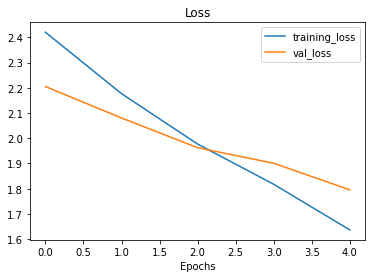

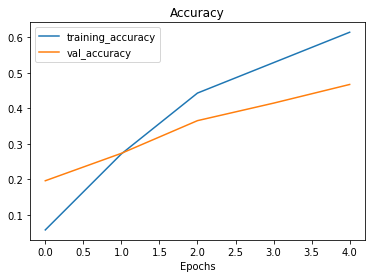

In [27]:
plot_loss_curves(history_2_percent)

# creating another model with 10% and with augmneted data 

In [33]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

--2022-05-21 16:53:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 142.250.188.48, 172.217.1.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   220MB/s    in 0.7s    

2022-05-21 16:53:46 (220 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [35]:
import tensorflow as tf
IMG_SIZE=(224,224)
train_data_10p=tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,label_mode="categorical",image_size=IMAGE_SIZE)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode="categorical",image_size=IMAGE_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
#creating model
data_augmentation=tf.keras.models.Sequential([
tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
],name="data_augmentationo")
input_shape=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
inputs=tf.keras.layers.Input(shape=input_shape,name="input_layer")
x=data_augmentation(inputs)
x=base_model(x,training=False)#if we use batchnorm layers ,we should set training to False
x=tf.keras.layers.GlobalAveragePooling2D(name="GlobalAveragePooling2D")(x)
outputs=tf.keras.layers.Dense(10,activation="softmax",name="output")(x)
model3=tf.keras.Model(inputs, outputs)
model3.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
model3.summary()

#creating model checkpoint callbacks

In [41]:
#creating checkpoint callbacks
checkpoint_path="ten_percent_model_checkpoint_weights/checkpoint.ckpt"
#create a model checkpoint weights 
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,save_best_only=False,save_freq="epoch",verbose=1)

In [42]:
initial_epochs=5
history3=model3.fit(train_data_10p,epochs=5,steps_per_epoch=len(train_data_10p),validation_data=test_data,validation_steps=(0.25 * len(test_data)),
 callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="model with 10% augmented data"),checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/model with 10% augmented data/20220521-172439
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0161 - accuracy: 0.3347
Epoch 1: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 19s 522ms/step - loss: 2.0161 - accuracy: 0.3347 - val_loss: 1.4894 - val_accuracy: 0.6562
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3810 - accuracy: 0.6653
Epoch 2: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 11s 438ms/step - loss: 1.3810 - accuracy: 0.6653 - val_loss: 1.0768 - val_accuracy: 0.7703
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0782 - accuracy: 0.7373
Epoch 3: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 10s 387ms/step - loss: 1.0782 - accuracy: 0.7373 - val_loss: 0.8962 - val_accuracy: 0

In [43]:
model1.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.6105 - accuracy: 0.8428


[0.6105035543441772, 0.8428000211715698]

In [44]:
model3.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.7012 - accuracy: 0.8156


[0.7011770009994507, 0.8155999779701233]

**important note : in here we noticed that with data augmentation , our result gets worse **

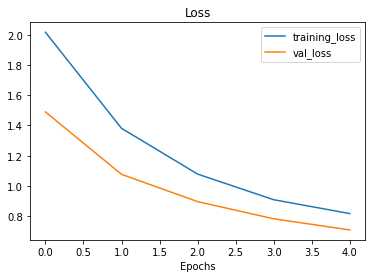

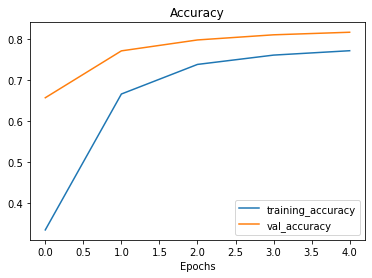

In [45]:
  plot_loss_curves(history3)